In [1]:
#What are the most in demand skills for 'Data Analyst', 'Data Engineer' and Senior Data Engineer'

#Methodology
#1. Clean-up skill column
#2. Calculate skill count based on 'job_title_short'
#3 Calculate skill percentage
#4. Plot findings

In [2]:
#conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)


c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_AUS = df[df['job_country'] == 'Australia']
df_skills = df_AUS.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
90,Data Scientist,python
90,Data Scientist,sql
90,Data Scientist,r
90,Data Scientist,java
90,Data Scientist,bash
...,...,...
785687,Senior Data Engineer,spark
785687,Senior Data Engineer,kafka
785687,Senior Data Engineer,airflow
785687,Senior Data Engineer,docker


In [17]:
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count

df_skills_count = df_skills_count.reset_index(name = 'skill_count')
df_skills_count

#Sort skill count from highest to lowest

df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_skills_count

#Need to find top 3 highest job_title counts
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles 

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

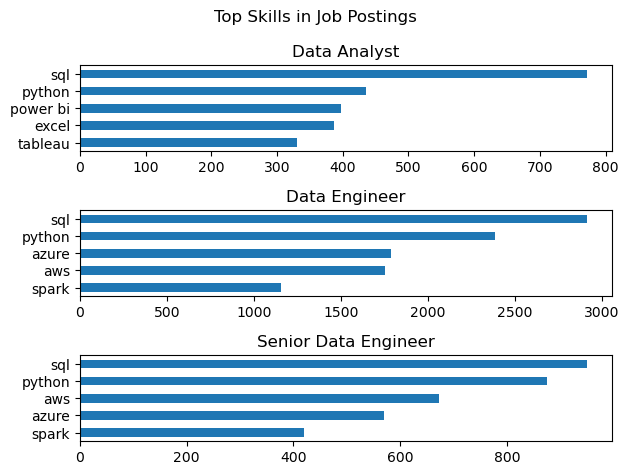

In [30]:
#Now plot it

fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
   


fig.suptitle('Top Skills in Job Postings', fontsize = 12)
plt.tight_layout()

In [37]:
#Now we want to get the percentage liklihood of each skill

df_job_title_count = df_AUS['job_title_short'].value_counts().reset_index(name = 'jobs_total')

#Now we need to merge this into df_skills_count 

df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_percent['skill_percent'] = 100* df_skills_percent['skill_count'] / df_skills_percent['jobs_total']
df_skills_percent

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Engineer,sql,2914,4658,62.559038
1,Data Engineer,python,2388,4658,51.266638
2,Data Engineer,azure,1789,4658,38.407042
3,Data Engineer,aws,1752,4658,37.612709
4,Data Engineer,spark,1157,4658,24.838987
...,...,...,...,...,...
1302,Data Analyst,flask,1,1658,0.060314
1303,Senior Data Engineer,powerbi,1,1482,0.067476
1304,Software Engineer,codecommit,1,1589,0.062933
1305,Data Analyst,firestore,1,1658,0.060314


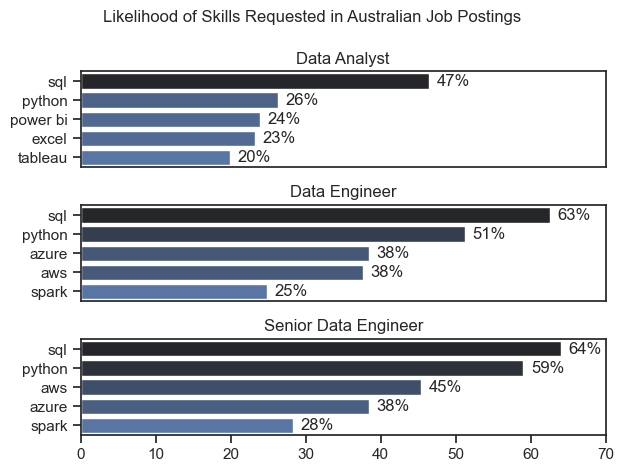

In [73]:
#Now plot it with df_skills_percent
import seaborn as sns

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = 'ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', dodge=False, legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 70)
   
    for n, v in enumerate (df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Australian Job Postings', fontsize = 12)
plt.tight_layout()